---
title: "conjugate prior"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

We will learn about conjugate priors in Bayesian statistics from a concrete example. Once we understand it, we will generalize the idea.

## question

Let's use here the same example from the chapter on [cross-entropy and KL divergence](/information_theory/cross-entropy.ipynb):

> Assume I live in city A, where it rains 50% of the days. A friend of mine lives in city B, where it rains 10% of the days. What happens when my friend visits me in city A and, not knowing any better, assumes that it rains 10% of the days?

The specific question we want to answer is: how can my friend update their belief about the probability of rain when they arrive in city A?

## bayes' theorem

We will use Bayes' theorem to update our friend's belief. 
To makes things easier to remember, let's call the hypothesis $p$ (the probability of rain), and the evidence $R$ (a specific observation of rain or no rain). Thus, Bayes' theorem can be rewritten as:

\begin{align}
P(p|R) &= \frac{P(R|p)\cdot P(p)}{P(R)} \\
\text{posterior}&= \frac{\text{likelihood}\cdot \text{prior}}{\text{evidence}}
\end{align}

where:

* $p$ is the hypothesis, the probability of rain.
* $R$ is the evidence, the observation of rain or no rain.
* $P(p)$ is the prior probability, our friend's initial belief about the probability of rain.
* $P(R|p)$ is the likelihood, the likelihood of observing rain given the hypothesis that it rains with a certain probability.
* $P(R)$ is the evidence, the total probability of observing the evidence.
* $P(p|R)$ is the posterior probability, this is what we want to find: our friend's updated belief about the probability of rain $p$ after observing the evidence.


## modeling the likelihood

In this problem, every day that passes it either rains or it does not rain. This can be understood as a Bernoulli process, where each day is an independent trial with two possible outcomes. "Success" would be ocurrence of rain ($R=1$), which happens with probability $p$. "Failure" would be no rain ($R=0$), which happens with probability $1-p$. In mathematical terms, the likelihood can be modeled as:

$$
P(R=r|p) = 
\begin{cases}
p & \text{if } r=1 \\
1-p & \text{if } r=0
\end{cases}.
$$

This can be more compactly written as:

$$
P(R=r|p) = p^r (1-p)^{1-r}.
$$

This equation describes only one observation. However, we can extend it to multiple observations. Suppose our friend observes, over a total of $n$ days, $k$ days of rain and $n-k$ days of no rain. The likelihood of observing this specific sequence of rain and no rain, given the probability $p$, can be modeled using the binomial distribution, which is the natural extension of the Bernoulli process for multiple trials:

$$
P(R=k|p) = \binom{n}{k} p^k (1-p)^{n-k}.
$$

This is the time to be more precise. When we previously said that "$p$ is the hypothesis, the probability of rain", we left behind the modeling aspect. We assumed here a generative model, the Bernoulli process. Rephrasing the statement more precisely: "$p$ is the parameter of the generative model (Bernoulli process) that generates the observations of rain and no rain".

## modeling the prior

The prior in the Bayesian framework is not a single value. From the question above, we might think that our friend's prior belief about the probability of rain is simply $0.1=10\%$. However, in Bayesian statistics, the prior is represented as a probability distribution over all possible values of $p$. In would make sense to choose a probability distribution that is highest around $0.1$ and lower elsewhere. There are infinite possible distributions that could represent this belief, so which should we choose? See below three examples of possible prior distributions, all have their mean at $0.1$.


In [7]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as grid_spec
from matplotlib.lines import Line2D
from scipy.stats import beta, norm, uniform, binom

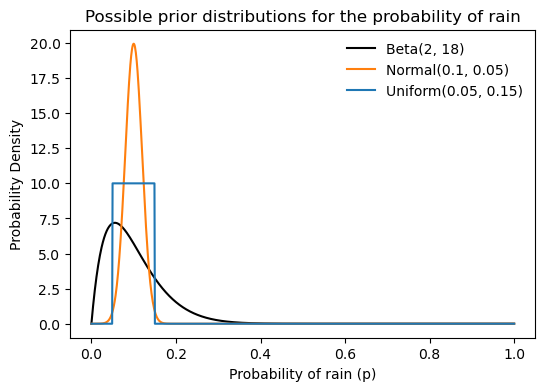

In [2]:
#| code-summary: "plot various possible distributions"
fig, ax = plt.subplots(figsize=(6, 4))
location = 0.1
p = np.linspace(0, 1, 1000)
ax.plot(p, beta.pdf(p, 2, 2/location-2), label='Beta(2, 18)', color="black")
ax.plot(p, norm.pdf(p, loc=location, scale=0.02), label='Normal(0.1, 0.05)', color="tab:orange")
ax.plot(p, uniform.pdf(p, loc=location-0.05, scale=0.1), label='Uniform(0.05, 0.15)', color="tab:blue")
ax.legend(frameon=False)
ax.set(xlabel='Probability of rain (p)',
       ylabel='Probability Density',
       title='Possible prior distributions for the probability of rain');

A particular good choice is the Beta distribution. The Beta distribution is defined on the interval [0, 1], which makes it suitable for modeling probabilities. It is parameterized by two positive shape parameters, $\alpha$ and $\beta$, which determine the shape of the distribution. The probability density function (PDF) of the Beta distribution is given by:

$$
\text{Beta}(p|\alpha, \beta) = \frac{p^{\alpha - 1} (1-p)^{\beta - 1}}{B(\alpha, \beta)},
$$

where $B(\alpha, \beta)$ is the Beta function, which serves as a normalization constant to ensure that the total probability integrates to 1.

The Beta distribution in the graph above is $\text{Beta}(p|\alpha=2, \beta=18)$. How did I choose these parameters? The mean of a Beta distribution is given by:

$$
\text{mean} = \frac{\alpha}{\alpha + \beta}.
$$

The derivation of this formula is not shown here, but it involves calculating the expected value of the distribution using its pdf, and using properties of the Beta function and of the Gamma function. Indeed, by choosing $\alpha=2$ and $\beta=18$, we get a mean of $0.1$.

Intuitively, a rain probability of $0.1$ means that out of every $n$ days, we expect it to rain on average $0.1n$ days. It terms of "successes" and "failures":

\begin{align*}
\text{mean} &= \frac{\alpha}{\alpha + \beta} \\
&= \frac{\text{expected successes}}{\text{expected successes} + \text{expected failures}} \\
&= \frac{\text{expected successes}}{\text{total number of trials}}
\end{align*}

Instead of choosing $\alpha=2$ and $\beta=18$, we could choose other values that maintain the same mean but represent different levels of confidence or prior knowledge. See the three Beta distributions plotted below. All have their mean at $0.1$, but the black one ($\alpha=2, \beta=18$) is more spread out, indicating less certainty about the probability of rain when only $2+18=20$ days are considered. Increasing the number of days to $50$ (orange, $\alpha=5, \beta=45$) or $200$ (blue, $\alpha=20, \beta=180$) makes the distribution more peaked around the mean, indicating greater confidence in the estimate of the probability of rain.

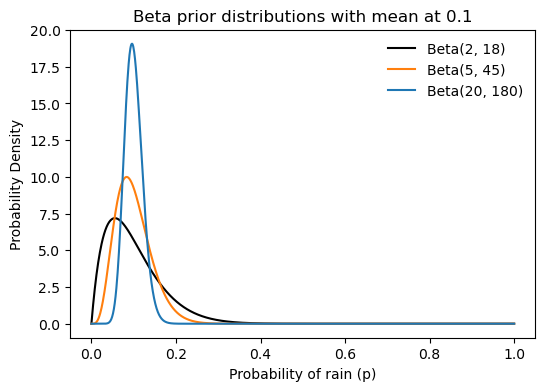

In [3]:
#| code-summary: "three beta distributions"
fig, ax = plt.subplots(figsize=(6, 4))
location = 0.1
p = np.linspace(0, 1, 1000)
ax.plot(p, beta.pdf(p, 2, 2/location-2), label='Beta(2, 18)', color="black")
ax.plot(p, beta.pdf(p, 5, 5/location-5), label='Beta(5, 45)', color="tab:orange")
ax.plot(p, beta.pdf(p, 20, 20/location-20), label='Beta(20, 180)', color="tab:blue")
ax.legend(frameon=False)
ax.set(xlabel='Probability of rain (p)',
       ylabel='Probability Density',
       title='Beta prior distributions with mean at 0.1');

## posterior looks like an updated prior

Why is this distribution particulary convenient? Note that it has the factors $p^{\alpha - 1}$ and $(1-p)^{\beta - 1}$, which are similar to the factors in the likelihood function $p^k (1-p)^{n-k}$.

According to Bayes' theorem, the posterior distribution is proportional to the product of the likelihood and the prior. Thus, if we choose a Beta distribution as the prior, the posterior distribution will also be a Beta distribution, but with updated parameters. Let's see how this works mathematically:

\begin{align*}
P(p|R=k) &= \frac{1}{\underbrace{P(R=k)}_{\text{evidence}}} \cdot \underbrace{P(R=k|p)}_{\text{likelihood}} \cdot \underbrace{P(p)}_{\text{prior}} \\
&= \frac{1}{P(R=k)} \left( \binom{n}{k} p^k (1-p)^{n-k} \right) \cdot \left( \frac{p^{\alpha - 1} (1-p)^{\beta - 1}}{B(\alpha, \beta)} \right) \\
&= \underbrace{ \frac{1}{P(R=k)} \binom{n}{k} \frac{1}{B(\alpha, \beta)} }_{\text{normalization constant}} p^{k + \alpha - 1} (1-p)^{n - k + \beta - 1}\\
& = \text{Beta}(p | \alpha + k, \beta + n - k) \\
& = \text{Beta}(p | \alpha + \text{successes}, \beta + \text{failures}).
\end{align*}

This isn't magic. We simply chose a prior distribution (Beta) that, when multiplied by the likelihood (Binomial), results in a posterior distribution of the same family (Beta). This property is what defines conjugate priors. Why is this useful?

* **Computational Simplicity:** The posterior distribution can be computed analytically without the need for complex numerical methods.
* **Intuitive Interpretation:** The parameters of the posterior distribution can be interpreted as updated counts of successes and failures, making it easy to understand how new data influences our beliefs.



## iterative updating of beliefs

Let's say that my friends Bob and Alice move to city A, where it rains on 50% of the days. Bob has a prior belief modeled as a Beta distribution with parameters $\alpha=2$ and $\beta=18$, reflecting his initial belief that it rains 10% of the days, but with a low level of confidence. Alice, however, has an initial belief closer to the truth, 20%, but with a much higher level of confidence, modeled as a Beta distribution with parameters $\alpha=100$ and $\beta=400$.
Every week that passes, they observe the weather and write down the number of rainy days, thus collecting the following data over 52 weeks (one year):

In [ ]:
#| code-summary: "generate binomial data for 52 weeks"
np.random.seed(6)
N_weeks = 52
success_array_daily = binom.rvs(n=1, p=0.5, size=N_weeks*7)  # first generate daily data
success_array = success_array_daily.reshape(-1, 7).sum(axis=1)  # aggragate to weekly data
# success_array = binom.rvs(n=7, p=0.5, size=N_weeks)  # do this if you don't need daily data
failure_array = 7 - success_array
sf_array = np.vstack([success_array, failure_array]).T
print(success_array)

[4 4 5 6 4 4 2 3 5 4 2 3 5 3 3 5 4 3 1 3 4 4 2 2 3 5 1 2 6 4 3 2 3 5 6 3 4
 5 3 5 2 3 4 3 3 5 5 3 5 6 5 2]


Now we just use the updating formula iteratively over the 52 weeks of observations:

In [134]:
#| code-summary: "update priors over 52 weeks and print parameters"
bobs_parameters = np.array([[2, 18]])
alices_parameters = np.array([[100, 400]])
print("\t\tBob\t\tBob\t\tAlice\tAlice")
print("week\talpha\tbeta\talpha\tbeta")
print(f"{0}\t\t{bobs_parameters[0][0]}\t\t{bobs_parameters[0][1]}\t\t{alices_parameters[0][0]}\t\t{alices_parameters[0][1]}")
for week in np.arange(N_weeks):
    bobs_last_weeks_parameters = bobs_parameters[-1]
    bobs_this_weeks_parameters = bobs_last_weeks_parameters + sf_array[week]
    bobs_parameters = np.vstack([bobs_parameters, bobs_this_weeks_parameters])

    alices_last_weeks_parameters = alices_parameters[-1]
    alices_this_weeks_parameters = alices_last_weeks_parameters + sf_array[week]
    alices_parameters = np.vstack([alices_parameters, alices_this_weeks_parameters])

    print(f"{week+1}\t\t{bobs_this_weeks_parameters[0]}\t\t{bobs_this_weeks_parameters[1]}\t\t{alices_this_weeks_parameters[0]}\t\t{alices_this_weeks_parameters[1]}")


		Bob		Bob		Alice	Alice
week	alpha	beta	alpha	beta
0		2		18		100		400
1		6		21		104		403
2		10		24		108		406
3		15		26		113		408
4		21		27		119		409
5		25		30		123		412
6		29		33		127		415
7		31		38		129		420
8		34		42		132		424
9		39		44		137		426
10		43		47		141		429
11		45		52		143		434
12		48		56		146		438
13		53		58		151		440
14		56		62		154		444
15		59		66		157		448
16		64		68		162		450
17		68		71		166		453
18		71		75		169		457
19		72		81		170		463
20		75		85		173		467
21		79		88		177		470
22		83		91		181		473
23		85		96		183		478
24		87		101		185		483
25		90		105		188		487
26		95		107		193		489
27		96		113		194		495
28		98		118		196		500
29		104		119		202		501
30		108		122		206		504
31		111		126		209		508
32		113		131		211		513
33		116		135		214		517
34		121		137		219		519
35		127		138		225		520
36		130		142		228		524
37		134		145		232		527
38		139		147		237		529
39		142		151		240		533
40		147		153		245		535
41		149		158		247		540
42		152		162		250		544
43		156		165		254		547
44

Finally, we can plot how the probability densities of Bob and Alice are updated over the 52 weeks.

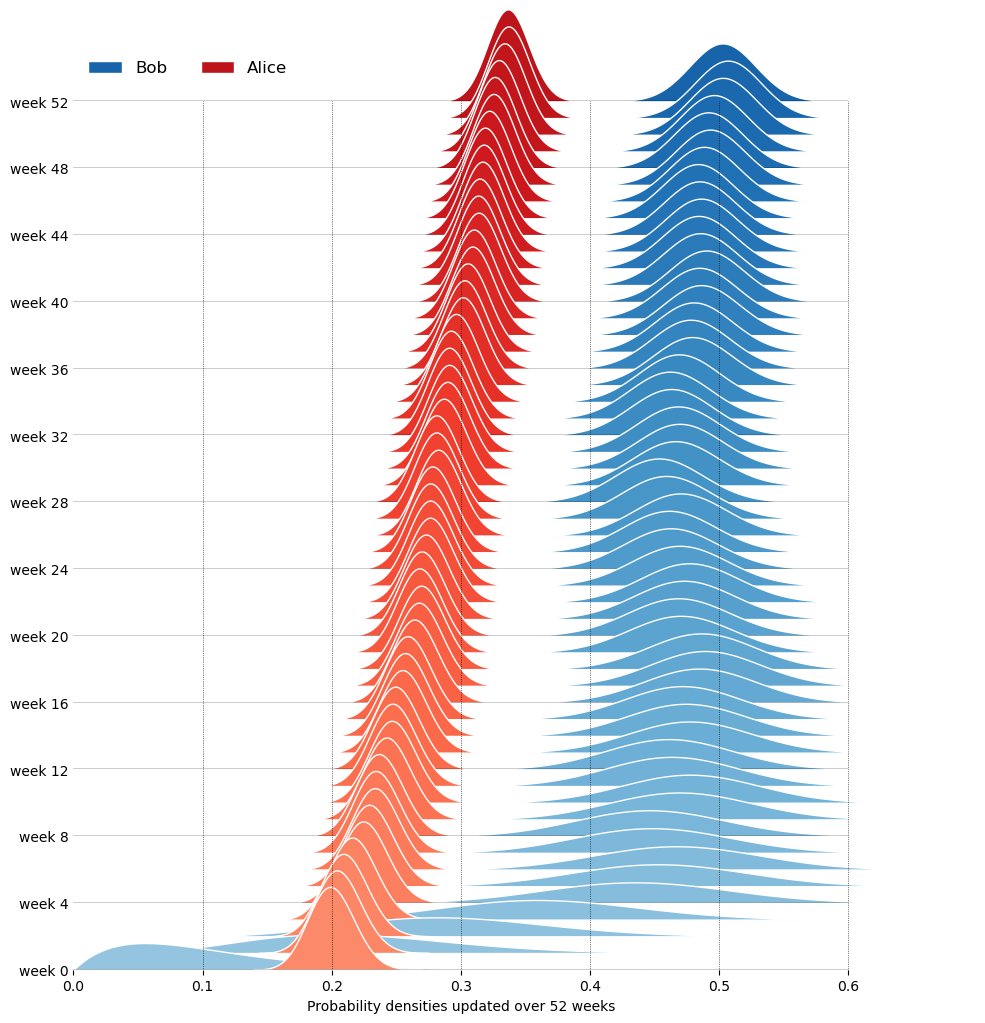

In [ ]:
#| code-summary: "ridge plot"
N_weeks = 52
N_panels = N_weeks + 1
gs = grid_spec.GridSpec(N_panels,1)
fig = plt.figure(figsize=(10,12))
p = np.linspace(0, 1, 1000)
bob_colors = mpl.cm.Blues(np.linspace(0.4,0.8,N_panels))
alice_colors = mpl.cm.Reds(np.linspace(0.4,0.8,N_panels))
ax_objs = []

for week in np.arange(N_panels)[::-1]:
    # creating new axes object, start from top = week 52
    ax_objs.append(fig.add_subplot(gs[N_panels-week-1:N_panels-week, 0:]))
    
    bobs_params = bobs_parameters[week]
    alices_params = alices_parameters[week]

    # don't plot the whole distribution, only when greater than threshold
    range_bob = beta.pdf(p, bobs_params[0], bobs_params[1])
    domain = np.where(range_bob > 1e-3*np.max(range_bob))
    ax_objs[-1].fill_between(p[domain], range_bob[domain],
                             color=bob_colors[week], alpha=1.0,
                             clip_on=False, ec="white", zorder=N_panels-week,
                             label="Bob")
    range_alice = beta.pdf(p, alices_params[0], alices_params[1])
    domain = np.where(range_alice > 1e-3*np.max(range_alice))
    ax_objs[-1].fill_between(p[domain], range_alice[domain],
                             color=alice_colors[week], alpha=1.0,
                             clip_on=False, ec="white", zorder=N_panels-week,
                             label="Alice")

    ax_objs[-1].set(xlim=(0,0.6),
                    ylim=(0,15),
                    yticks=[])
    if week>0:
        ax_objs[-1].set_xticks([])

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    ax_objs[-1].set_yticklabels([])

    if week == N_panels-1:
        ax_objs[-1].legend(frameon=False, loc="upper left", fontsize=12, ncol=2)
    if week%4==0:
        ax_objs[-1].set_yticks([0])
        ax_objs[-1].set_yticklabels([f"week {week}"])
        ax_objs[-1].tick_params(axis='y', length=0)
        ax_objs[-1].axhline(0, color="black", lw=1, zorder=N_panels-week+1)
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

ax_objs[-1].set(xlabel='Probability densities updated over 52 weeks')
gs.update(hspace=-0.7)

ax_top = ax_objs[0]
ax_bottom = ax_objs[-1]
pos_top = ax_top.get_position().extents # left, bottom, right, top
pos_bottom = ax_bottom.get_position().extents # left, bottom, right, top
x_dotted_lines = [0.1,0.2,0.3,0.4,0.5,0.6]
for x in x_dotted_lines:
    display_coord = ax_bottom.transData.transform([x, 0.0])  # convert data coordinates to display coordinates
    fig_coord = fig.transFigure.inverted().transform(display_coord)  # convert display coordinates to figure coordinates
    line = Line2D([fig_coord[0], fig_coord[0]],     # x coordinates
                [fig_coord[1], pos_top[1]],          # y coordinates
                transform=fig.transFigure, color='black', ls=':', lw=0.5)
    fig.add_artist(line)

Although Alice starts with a more accurate prior, Bob's belief converges faster towards the true probability of rain (50%) over time, because his prior at week 0 was less confident (more spread out), allowing new evidence to have a greater impact on his posterior belief. For each person's pdf, we can plot its mean and standard deviation over time. For a Beta distribution $\text{Beta}(p|\alpha, \beta)$, the mean and variance are given by:

\begin{align*}
\text{mean} &= \frac{\alpha}{\alpha + \beta}, \\
\text{variance} &= \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.
\end{align*}

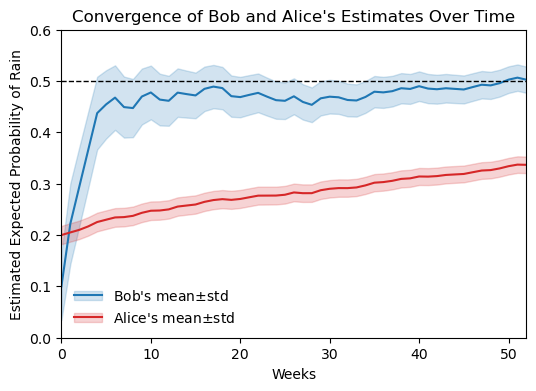

In [ ]:
#| code-summary: "Bob and Alice's estimates over time"
fig, ax = plt.subplots(figsize=(6,4))
t = np.arange(N_weeks+1)

def beta_mean(alpha, beta):
    return alpha / (alpha + beta)
def beta_variance(alpha, beta):
    return (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))

bob_means = beta_mean(bobs_parameters[:,0], bobs_parameters[:,1])
bob_sqrt_variance = np.sqrt(beta_variance(bobs_parameters[:,0], bobs_parameters[:,1]))
alice_means = beta_mean(alices_parameters[:,0], alices_parameters[:,1])
alice_sqrt_variance = np.sqrt(beta_variance(alices_parameters[:,0], alices_parameters[:,1]))

line_bob, = ax.plot(t, bob_means, color="tab:blue", label="Bob's Mean")
fill_bob = ax.fill_between(t, bob_means - bob_sqrt_variance, bob_means + bob_sqrt_variance,
                color="tab:blue", alpha=0.2, label="Bob's Std Dev")
line_alice, = ax.plot(t, alice_means, color="tab:red", label="Alice's Mean")
fill_alice = ax.fill_between(t, alice_means - alice_sqrt_variance, alice_means + alice_sqrt_variance,
                color="tab:red", alpha=0.2, label="Alice's Std Dev")

ax.axhline(0.5, color="black", ls="--", lw=1)
ax.legend([(line_bob, fill_bob), (line_alice, fill_alice)],
          [r"Bob's mean$\pm$std", r"Alice's mean$\pm$std"],
          handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=1)},
          frameon=False)

ax.set(xlabel='Weeks',
       ylabel='Estimated Expected Probability of Rain',
       title='Convergence of Bob and Alice\'s Estimates Over Time',
       ylim=(0,0.6),
       xlim=(0,N_weeks));

## comparison with frequentist approach

Let's add to the graph above one more line, for Charlie, who follows a frequentist approach to estimate the probability of rain over time. Charlie doesn't have any prior belief; instead, he simply counts the number of rainy days observed so far ($k$) and divides it by the total number of days that passed ($n$).
As shown in the chapter [MLE and summary statistics](/foundations/MLE_and_summary_statistics.html#binomial-distribution), when assuming a generative model that is a Bernoulli process (or Binomial distribution for multiple trials), the maximum likelihood estimate (MLE) of the probability of success (rain) is given by the ratio of the number of successes to the total number of trials:

$$
\hat{p} = \frac{k}{n}.
$$

The conclusion here is that, even if Charlied doesn't know it, his estimate is based on the Maximum Likelihood Estimation (MLE) principle.

This time, instead of plotting the weekly estimates, let's see what happens if each of the residents of city A updates their beliefs daily.

In [ ]:
#| code-summary: "compute daily parameter updates for Bob and Alice"
failure_array_daily = 1 - success_array_daily
sf_array_daily = np.vstack([success_array_daily, failure_array_daily]).T

bobs_parameters_daily = np.array([[2, 18]])
alices_parameters_daily = np.array([[100, 400]])

for day in np.arange(N_weeks*7):
    bobs_yesterdays_parameters = bobs_parameters_daily[-1]
    bobs_todays_parameters = bobs_yesterdays_parameters + sf_array_daily[day]
    bobs_parameters_daily = np.vstack([bobs_parameters_daily, bobs_todays_parameters])
    alices_yesterdays_parameters = alices_parameters_daily[-1]
    alices_todays_parameters = alices_yesterdays_parameters + sf_array_daily[day]
    alices_parameters_daily = np.vstack([alices_parameters_daily, alices_todays_parameters])

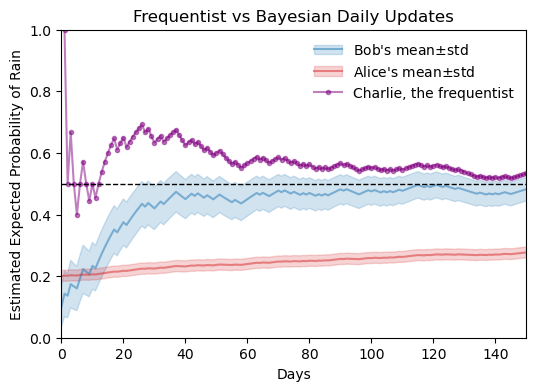

In [156]:
#| code-summary: "frequentist vs Bayesian daily updates"
fig, ax = plt.subplots(figsize=(6,4))

t = 7*np.arange(N_weeks+1)
t_day= np.arange(N_weeks*7+1)


bob_means_daily = beta_mean(bobs_parameters_daily[:,0], bobs_parameters_daily[:,1])
bob_sqrt_variance_daily = np.sqrt(beta_variance(bobs_parameters_daily[:,0], bobs_parameters_daily[:,1]))
alice_means_daily = beta_mean(alices_parameters_daily[:,0], alices_parameters_daily[:,1])
alice_sqrt_variance_daily = np.sqrt(beta_variance(alices_parameters_daily[:,0], alices_parameters_daily[:,1]))

line_bob_daily, = ax.plot(t_day, bob_means_daily, color="tab:blue", label="Bob's Mean (Daily)", alpha=0.5, ls="-")
fill_bob_daily = ax.fill_between(t_day, bob_means_daily - bob_sqrt_variance_daily, bob_means_daily + bob_sqrt_variance_daily,
                color="tab:blue", alpha=0.2, label="Bob's Std Dev")
line_alice_daily, = ax.plot(t_day, alice_means_daily, color="tab:red", label="Alice's Mean (Daily)", alpha=0.5, ls="-")
fill_alice_daily = ax.fill_between(t_day, alice_means_daily - alice_sqrt_variance_daily, alice_means_daily + alice_sqrt_variance_daily,
                color="tab:red", alpha=0.2, label="Alice's Std Dev")

bob_parameters_frequentist = bobs_parameters_daily - bobs_parameters_daily[0]
bob_means_frequentist = bob_parameters_frequentist[1:,0] / (bob_parameters_frequentist[1:,0] + bob_parameters_frequentist[1:,1])
line_bob_frequentist, = ax.plot(t_day[1:], bob_means_frequentist, color="purple", label="Bob's Frequentist Estimate", ls="-", marker="o", markersize=3, alpha=0.5, clip_on=True)

ax.axhline(0.5, color="black", ls="--", lw=1)
ax.legend([(line_bob_daily, fill_bob_daily), (line_alice_daily, fill_alice_daily), (line_bob_frequentist,)],
          [r"Bob's mean$\pm$std", r"Alice's mean$\pm$std", "Charlie, the frequentist"],
          handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=1)},
          frameon=False)

ax.set(xlabel='Days',
       ylabel='Estimated Expected Probability of Rain',
       title='Frequentist vs Bayesian Daily Updates',
       ylim=(0,1),
       xlim=(0,150)
       );

Let's digest what we see above.

* The frequentist approach does not use prior beliefs, it simply estimates the probability based on the observed data.
* At day zero, Bob and Alice have beliefs about the world, but Charlie doesn't have any data to base his estimate on, so we see nothing for him at day zero.
* The very first day was a rainy day, so Charlie's estimate begins at 100%.
* In the following days, Charlie's estimate fluctuates more wildly than Bob's and Alice's, especially in the early weeks when the amount of data is still small. As more data is collected, Charlie's estimate stabilizes and converges towards the true probability of rain (50%).
* As the number of observations increases, all three estimates (Bob's, Alice's, and Charlie's) converge towards the true probability of rain (50%).

Pierre-Simon Laplace came up with a solution to Charlie's "small sample size" problem, where he estimates 100% probability of rain on day one. Laplace did that in a similar context, answering the question "will the sun rise tomorrow?". Instead of not assuming anything like Charlie, Laplace proposes the "rule of succession", which says that we assume one success and one failure even before observing any data. Translating that to a Beta prior, it means starting with $\alpha=1$ and $\beta=1$, which is a uniform prior over $p$, see the graph below.

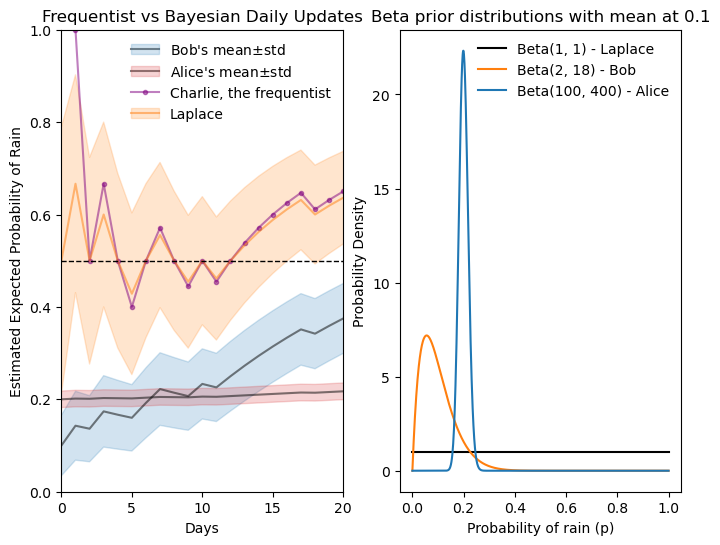

In [155]:
#| code-summary: "Laplace vs frequentist vs Bayesian daily updates"

laplaces_parameters_daily = np.array([[1, 1]])
for day in np.arange(N_weeks*7):
    laplaces_yesterdays_parameters = laplaces_parameters_daily[-1]
    laplaces_todays_parameters = laplaces_yesterdays_parameters + sf_array_daily[day]
    laplaces_parameters_daily = np.vstack([laplaces_parameters_daily, laplaces_todays_parameters])

fig, ax = plt.subplots(1, 2, figsize=(8,6))

laplaces_means_daily = beta_mean(laplaces_parameters_daily[:,0], laplaces_parameters_daily[:,1])
laplaces_sqrt_variance_daily = np.sqrt(beta_variance(laplaces_parameters_daily[:,0], laplaces_parameters_daily[:,1]))

line_bob_daily, = ax[0].plot(t_day, bob_means_daily, color="black", label="Bob's Mean (Daily)", alpha=0.5, ls="-")
fill_bob_daily = ax[0].fill_between(t_day, bob_means_daily - bob_sqrt_variance_daily, bob_means_daily + bob_sqrt_variance_daily,
                color="tab:blue", alpha=0.2, label="Bob's Std Dev")
line_alice_daily, = ax[0].plot(t_day, alice_means_daily, color="black", label="Alice's Mean (Daily)", alpha=0.5, ls="-")
fill_alice_daily = ax[0].fill_between(t_day, alice_means_daily - alice_sqrt_variance_daily, alice_means_daily + alice_sqrt_variance_daily,
                color="tab:red", alpha=0.2, label="Alice's Std Dev")

bob_parameters_frequentist = bobs_parameters_daily - bobs_parameters_daily[0]
bob_means_frequentist = bob_parameters_frequentist[1:,0] / (bob_parameters_frequentist[1:,0] + bob_parameters_frequentist[1:,1])
line_bob_frequentist, = ax[0].plot(t_day[1:], bob_means_frequentist, color="purple", label="Bob's Frequentist Estimate", ls="-", marker="o", markersize=3, alpha=0.5, clip_on=True)

line_laplaces_daily, = ax[0].plot(t_day, laplaces_means_daily, color="tab:orange", label="Laplace's Mean (Daily)", alpha=0.5, ls="-")
fill_laplaces_daily = ax[0].fill_between(t_day, laplaces_means_daily - laplaces_sqrt_variance_daily, laplaces_means_daily + laplaces_sqrt_variance_daily,
                color="tab:orange", alpha=0.2, label="Laplace's Std Dev")

ax[0].axhline(0.5, color="black", ls="--", lw=1)
ax[0].legend([(line_bob_daily, fill_bob_daily), (line_alice_daily, fill_alice_daily), (line_bob_frequentist,), (line_laplaces_daily, fill_laplaces_daily)],
          [r"Bob's mean$\pm$std", r"Alice's mean$\pm$std", "Charlie, the frequentist", "Laplace"],
          handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=1)},
          frameon=False)

ax[0].set(xlabel='Days',
       ylabel='Estimated Expected Probability of Rain',
       title='Frequentist vs Bayesian Daily Updates',
       ylim=(0,1),
       xlim=(0,20)
       );

p = np.linspace(0, 1, 1000)
ax[1].plot(p, beta.pdf(p, laplaces_parameters_daily[0,0], laplaces_parameters_daily[0,1]), label='Beta(1, 1) - Laplace', color="black")
ax[1].plot(p, beta.pdf(p, bobs_parameters_daily[0,0], bobs_parameters_daily[0,1]), label=f'Beta({bobs_parameters_daily[0,0]}, {bobs_parameters_daily[0,1]}) - Bob', color="tab:orange")
ax[1].plot(p, beta.pdf(p, alices_parameters_daily[0,0], alices_parameters_daily[0,1]), label=f'Beta({alices_parameters_daily[0,0]}, {alices_parameters_daily[0,1]}) - Alice', color="tab:blue")
ax[1].legend(frameon=False)
ax[1].set(xlabel='Probability of rain (p)',
       ylabel='Probability Density',
       title='Beta prior distributions with mean at 0.1');

Laplace's estimate doesn't suffer from Charlie's extreme initial estimate. Just after a few days, however, it is almost indistinguishable from Charlie's estimate.

## conjugate pairs

In the example above, we saw how convenient it is to use a prior function that is conjugate to the likelihood function. The generating process behind the observations was a Bernoulli process (or Binomial distribution for multiple trials), so we chose its conjugate, the Beta distribution.

Some examples of processes that can be described by a Binomial distribution (or Bernoulli process) are:

* **Conversion Rates:** A marketing team has a prior belief about how many people will click an email link (Success) vs. ignore it (Failure).
* **Quality Control:** A factory manager has a prior belief about the proportion of defective items (Success) vs. non-defective items (Failure) in a production batch.
* **Medical Trials:** A researcher has a prior belief about the effectiveness of a new drug (Success) vs. ineffectiveness (Failure) based on preliminary studies.

What if the generating process was different?

###  Poisson distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space (the "count"). The Gamma distribution is its conjugate prior because it is defined for positive values (0 to $\infty$), making it perfect for modeling the rate ($\lambda$) at which these events happen. It can be used in scenarios such as:

* **Ecohydrology:** Modeling the number of rainfall pulses in a desert ecosystem during the growing season.
* **Customer Service:** Estimating the rate of phone calls arriving at a help desk per hour.
* **Radioactive Decay:** Predicting the number of particles emitted by a substance over a specific duration.

### normal distribution (known variance)

When you assume your data follows a Normal distribution (like measurement errors) and you know the variance, the conjugate prior for the mean is also a Normal distribution. This creates a beautiful "weighted average" effect: the posterior mean will sit somewhere between your prior guess and the data's mean, depending on which one is more certain. It is useful in scenarios such as:

* **Measurement Errors:** Estimating the true value of a physical quantity when measurements are subject to random errors.
* **Quality Control:** Determining the average weight of products in a manufacturing process where individual weights vary normally around a true mean.
* **Psychometrics:** Estimating the average score of a psychological test when individual scores are normally distributed with known variance.

### categorical / multinomial distribution

This is the multi-dimensional version of the Beta distribution. Instead of just "Success/Failure," you have multiple categories (e.g., "Rain/Sun/Clouds"). The Dirichlet distribution allows you to track the probabilities of all these categories simultaneously. It is useful in scenarios such as:

* **Topic Modeling:** In Machine Learning, determining the "theme" of a document by looking at the frequency of different words (each word is a category).
* **Political Polling:** Estimating the support for four different candidates in an upcoming election.
* **Genetics:** Modeling the frequency of different alleles (gene variants) within a specific population.

## uniform distribution (known bounds)

This is used when you are trying to find the maximum possible value ($\theta$) of a process. If you assume the data is spread evenly (Uniform) up to some unknown limit, the Pareto distribution is the conjugate prior that helps you "narrow in" on where that upper limit actually sits. It is useful in scenarios such as:

* **The German Tank Problem:** Estimating the total number of tanks produced by an enemy based on the highest serial number found on captured tanks.
* **Ecological Limits:** Estimating the maximum possible size a specific fish species can reach based on the largest specimens caught.
* **Quality Control:** Determining the maximum defect size in a batch of manufactured items based on the largest defect observed in a sample.
* **Project Management:** Estimating the maximum time required to complete a project based on the longest time taken for similar past projects.
